Kod z zajęć:

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split

file = 'https://marcingabryel.pl/ai/iris.csv'
dataframe = pd.read_csv(file)
print(dataframe)
print(dataframe['variety'].unique() )
dataframe['y'] = dataframe['variety'].map({'Setosa': 1.0, 'Versicolor': 0.0, 'Virginica': 0.0})
print(dataframe)
print("Unikalne wartości w y:",dataframe['y'].unique())

x = dataframe[ ['sepal.length','sepal.width', 'petal.length','petal.width']]
y = dataframe['y']
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size = 0.2)

print("x train:\n",x_train.head(20))
print("x test:\n",x_test.head(20))
print("y train:\n",y_train.head(20))
print("y test:\n",y_test.head(20))

x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()





     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]
['Setosa' 'Versicolor' 'Virginica']
     sepal.length  sepal.width  petal.length  petal.width    variety    y
0             5.1          3.5        

In [63]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Input

#liczba neuronów pierwszej warstwy
M = 3
#liczba epok nauczania
E = 100

model = Sequential()
model.add(Input(shape=(4,)))
model.add(Dense(M,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer="adam", loss='binary_crossentropy')

history = model.fit(x_train, y_train, epochs=E, batch_size=1, verbose=0)


Ostatni błąd: 0.0032032986637204885


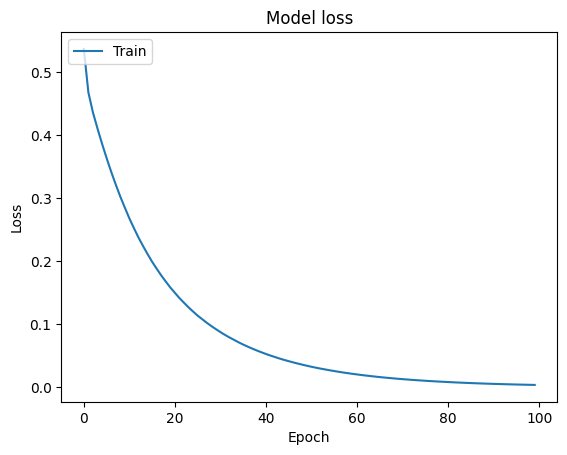

In [64]:
import matplotlib.pyplot as plt
print("Ostatni błąd:", history.history['loss'][-1])
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [65]:
import numpy as np
#treningowe
y_result_train = model.predict(x_train)

print( np.column_stack((np.round(y_result_train), y_train) ))

bledy = 0
for i in range(len(y_train)):
  if np.round(y_result_train[i]) != y_train[i]:
    bledy += 1
print("Liczba bledow ciagu treningowego: ", bledy)

#testowe
y_result_test = model.predict(x_test)

print( np.column_stack((np.round(y_result_test), y_test) ))

bledy2 = 0
for i in range(len(y_test)):
  if np.round(y_result_test[i]) != y_test[i]:
    bledy2 += 1
print("Liczba bledow ciagu treningowego: ", bledy2)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]

##Zadanie nr 1:

próba 1
Model nie nauczył się w zakładanym czasie
Ostatni błąd: 0.6366246938705444


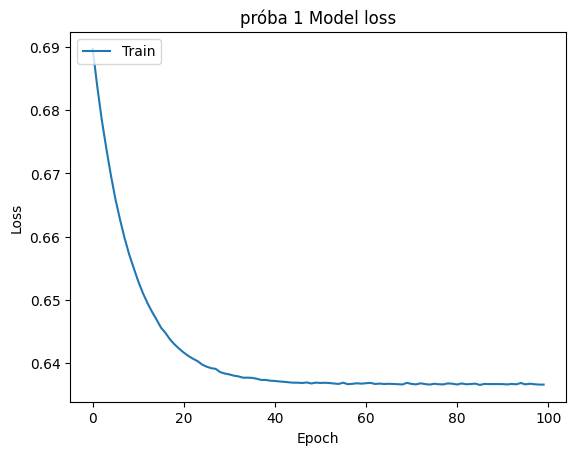

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Liczba bledow ciagu treningowego:  40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Liczba bledow ciagu treningowego:  10
próba 2
Iteracja w której błąd jest mniejszy od 0.1: 83
Ostatni błąd: 0.06507843732833862


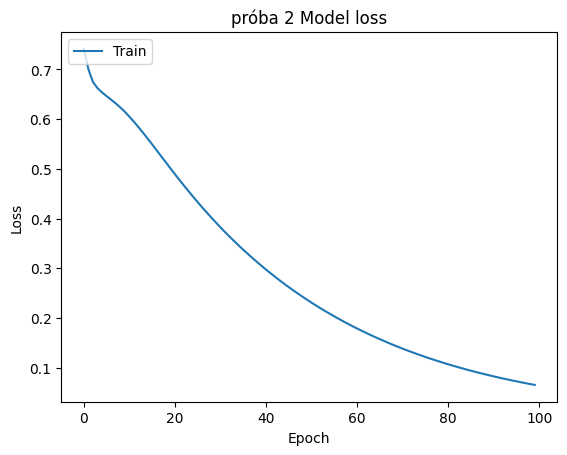

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Liczba bledow ciagu treningowego:  0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Liczba bledow ciagu treningowego:  0
próba 3
Iteracja w której błąd jest mniejszy od 0.1: 39
Ostatni błąd: 0.006417418830096722


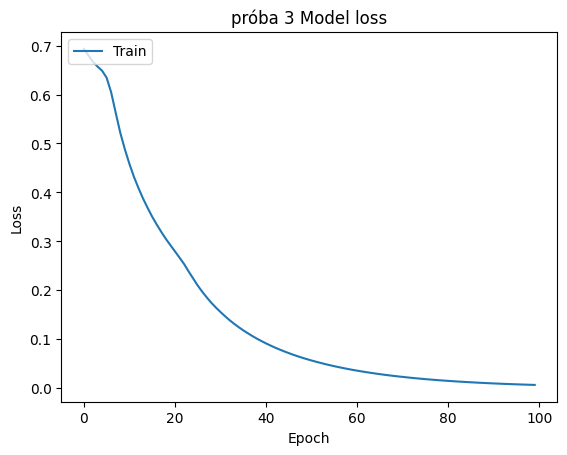

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Liczba bledow ciagu treningowego:  0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Liczba bledow ciagu treningowego:  0
próba 4
Iteracja w której błąd jest mniejszy od 0.1: 45
Ostatni błąd: 0.007999319583177567


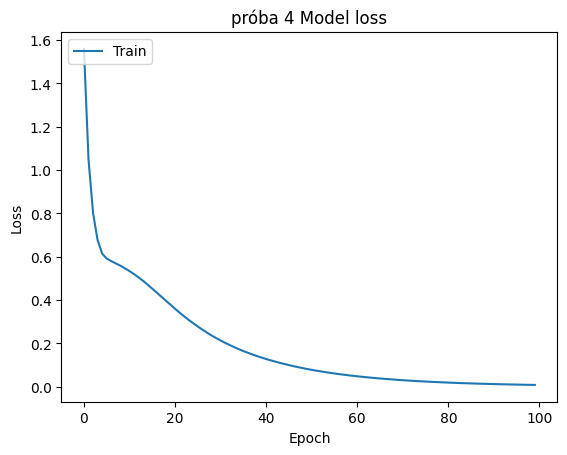

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Liczba bledow ciagu treningowego:  0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Liczba bledow ciagu treningowego:  0


In [66]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Input
import matplotlib.pyplot as plt
import numpy as np

def netTest(epochs, layers, label):
  print(label)
  _model = Sequential()
  _model.add(Input(shape=(4,)))
  for i in range(len(layers)//2):
    _model.add(Dense(layers[i*2],activation=layers[i*2+1]))
  _model.add(Dense(1,activation='sigmoid'))
  _model.compile(optimizer="adam", loss='binary_crossentropy')
  _history = _model.fit(x_train, y_train, epochs=epochs, batch_size=1, verbose=0)

  firstLearnedEpoch = 0
  for i in range(len(_history.history['loss'])):
    if( _history.history['loss'][i] < 0.1):
      firstLearnedEpoch = i
      break;
  if(firstLearnedEpoch == 0):
    print("Model nie nauczył się w zakładanym czasie")
  else:
    print("Iteracja w której błąd jest mniejszy od 0.1:", firstLearnedEpoch)
  print("Ostatni błąd:", _history.history['loss'][-1])
  plt.plot(_history.history['loss'])
  plt.title(label+' Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train'], loc='upper left')
  plt.show()

  #treningowe
  _y_result_train = _model.predict(x_train)

  #print( np.column_stack((np.round(_y_result_train), y_train) ))
  _bledy = 0
  for i in range(len(y_train)):
    if np.round(_y_result_train[i]) != y_train[i]:
      _bledy += 1
  print("Liczba bledow ciagu treningowego: ", _bledy)

  #testowe
  _y_result_test = _model.predict(x_test)

  #print( np.column_stack((np.round(_y_result_test), y_test) ))

  _bledy2 = 0
  for i in range(len(y_test)):
    if np.round(_y_result_test[i]) != y_test[i]:
      _bledy2 += 1
  print("Liczba bledow ciagu treningowego: ", _bledy2)

netTest(100, [1,'relu'], "próba 1")
netTest(100, [1,'sigmoid'], "próba 2")
netTest(100, [2,'sigmoid'], "próba 3")
netTest(100, [2,'relu'], "próba 4")



##Zadanie nr 2:
###Rozpoznawanie Versicolor:

Model wykrywający Versicolor
Iteracja w której błąd jest mniejszy od 0.1: 124
Ostatni błąd: 0.03208894655108452


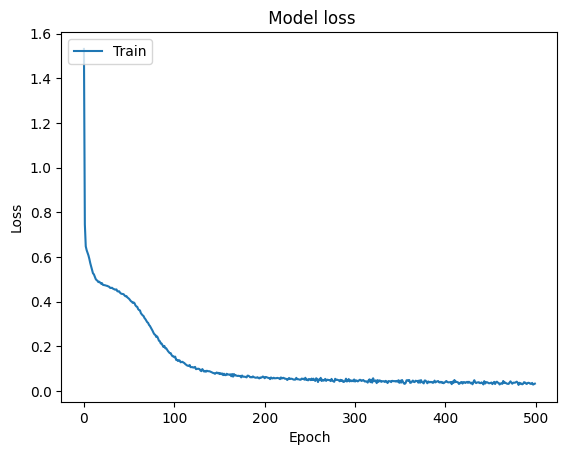

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Liczba bledow ciagu treningowego:  2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Liczba bledow ciagu testowego:  2


In [67]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Input
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import copy
def roundArr(_arr):
  arr = copy.deepcopy(_arr)
  for i in range(len(arr)):
    arr[i] = np.round(arr[i])
  return arr

y2 = dataframe['variety'].map({'Setosa': 0.0, 'Versicolor': 1.0, 'Virginica': 0.0})
x_train, x_test, y_train2, y_test2 = train_test_split(x, y2, stratify=y2, test_size = 0.2)
x_train = x_train.to_numpy()
y_train2 = y_train2.to_numpy()
x_test = x_test.to_numpy()
y_test2 = y_test2.to_numpy()
print("Model wykrywający Versicolor")
model2 = Sequential()
model2.add(Input(shape=(4,)))
model2.add(Dense(6,activation='relu'))
model2.add(Dense(6,activation='relu'))
model2.add(Dense(1,activation='sigmoid'))
model2.compile(optimizer="adam", loss='binary_crossentropy')
history2 = model2.fit(x_train, y_train2, epochs=500, batch_size=1, verbose=0)

firstLearnedEpoch2 = 0
for i in range(len(history2.history['loss'])):
  if( history2.history['loss'][i] < 0.1):
    firstLearnedEpoch2 = i
    break;
if(firstLearnedEpoch2 == 0):
  print("Model nie nauczył się w zakładanym czasie")
else:
  print("Iteracja w której błąd jest mniejszy od 0.1:", firstLearnedEpoch2)
print("Ostatni błąd:", history2.history['loss'][-1])
plt.plot(history2.history['loss'])
plt.title(' Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
#treningowe
y_result_train2 = model2.predict(x_train)
y_result_train_rounded2 = roundArr(y_result_train2)
bledy21 = 0
for i in range(len(y_train2)):
  if y_result_train_rounded2[i] != y_train2[i]:
    bledy21 += 1
print("Liczba bledow ciagu treningowego: ", bledy21)

#testowe
y_result_test2 = model2.predict(x_test)
y_result_test_rounded2 = roundArr(y_result_test2)
bledy22 = 0
for i in range(len(y_test2)):
  if y_result_test_rounded2[i] != y_test2[i]:
    bledy22 += 1
print("Liczba bledow ciagu testowego: ", bledy22)




###Rozpoznawanie Virginica

Model wykrywający Virginica
Iteracja w której błąd jest mniejszy od 0.1: 44
Ostatni błąd: 0.06688948720693588


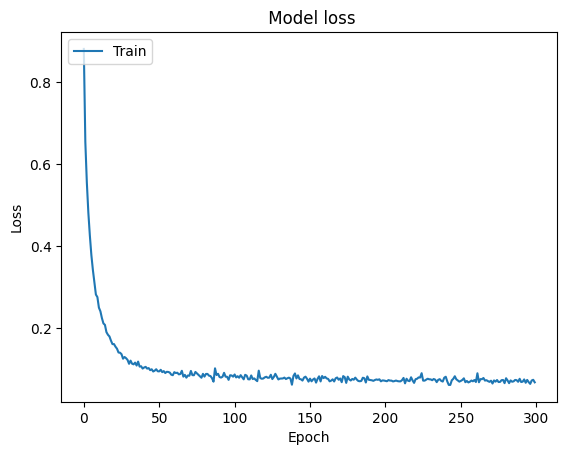

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Liczba bledow ciagu treningowego:  2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Liczba bledow ciagu testowego:  0


In [68]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Input
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import copy

y3 = dataframe['variety'].map({'Setosa': 0.0, 'Versicolor': 0.0, 'Virginica': 1.0})
x_train, x_test, y_train3, y_test3 = train_test_split(x, y3, stratify=y3, test_size = 0.2)
x_train = x_train.to_numpy()
y_train3 = y_train3.to_numpy()
x_test = x_test.to_numpy()
y_test3 = y_test3.to_numpy()
print("Model wykrywający Virginica")
model3 = Sequential()
model3.add(Input(shape=(4,)))
model3.add(Dense(6,activation='relu'))
model3.add(Dense(6,activation='relu'))
model3.add(Dense(1,activation='sigmoid'))
model3.compile(optimizer="adam", loss='binary_crossentropy')
history3 = model3.fit(x_train, y_train3, epochs=300, batch_size=1, verbose=0)

firstLearnedEpoch3 = 0
for i in range(len(history3.history['loss'])):
  if( history3.history['loss'][i] < 0.1):
    firstLearnedEpoch3 = i
    break;
if(firstLearnedEpoch3 == 0):
  print("Model nie nauczył się w zakładanym czasie")
else:
  print("Iteracja w której błąd jest mniejszy od 0.1:", firstLearnedEpoch3)
print("Ostatni błąd:", history3.history['loss'][-1])
plt.plot(history3.history['loss'])
plt.title(' Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
#treningowe
y_result_train3 = model3.predict(x_train)
y_result_train_rounded3 = roundArr(y_result_train3)
bledy31 = 0
for i in range(len(y_train3)):
  if y_result_train_rounded3[i] != y_train3[i]:
    bledy31 += 1
print("Liczba bledow ciagu treningowego: ", bledy31)

#testowe
y_result_test3 = model3.predict(x_test)
y_result_test_rounded3 = roundArr(y_result_test3)
bledy32 = 0
for i in range(len(y_test3)):
  if y_result_test_rounded3[i] != y_test3[i]:
    bledy32 += 1
print("Liczba bledow ciagu testowego: ", bledy32)

Możemy zauważyć, że o wiele łatwiej było nam odróżnić Setosę od pozostałych gatunków irysa w stodunku do odróżnienia pozostałych. Zapewnie Versicolor i Virginica mają więcej ze sobą wspólnego i są cięższe od odróżnienia od siebie nawzajem.
#Zadanie nr 3:
Rozwiązania z zadania pierwszego możemy zastosować w zadaniu drugim, zmieniając lekko naszą sieć.
wystarczy zamiast 1 wyjścia z sieci stworzyć 3 wyjścia.
Dzięki temu wynik, który obecnie otrzymywaliśmy dla rozpoznania danego irysa jako 1 to teraz otrzymamy jako [1,0,0].
##Kroki aby odpowiednio przekształcić poprzednie rozwiązanie:
1. wektor y zamienić na macierz y z wartościami np. [1, 0, 0]
2. zmienić ilość neuronów ostatniej warstwy z 1 na 3


     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]
['Setosa' 'Versicolor' 'Virginica']
     sepal.length  sepal.width  petal.length  petal.width    variety  \
0             5.1          3.5          

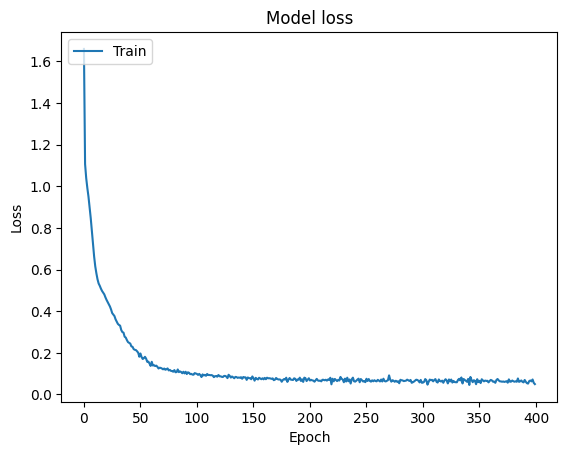

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Liczba bledow ciagu treningowego:  0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Liczba bledow ciagu testowego:  0


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Input
import copy
file = 'https://marcingabryel.pl/ai/iris.csv'
dataframe = pd.read_csv(file)
print(dataframe)
print(dataframe['variety'].unique() )
#przypisanie odpowiednich wartości do macierzy y;
dataframe['y'] = dataframe['variety'].map({'Setosa': [1.0,0.0,0.0], 'Versicolor': [0.0,1.0,0.0], 'Virginica': [0.0,0.0,1.0]})
print(dataframe)
x = dataframe[ ['sepal.length','sepal.width', 'petal.length','petal.width']]
y = np.vstack(dataframe['variety'].map({'Setosa': [1.0,0.0,0.0], 'Versicolor': [0.0,1.0,0.0], 'Virginica': [0.0,0.0,1.0]}).to_numpy())
#podział na części treningowe i testowe
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size = 0.2)

print("x train:\n",x_train)
print("x test:\n",x_test)
print("y train:\n",y_train)
print("y test:\n",y_test)

x_train = x_train.to_numpy()
x_test = x_test.to_numpy()



#liczba neuronów pierwszej warstwy
M = 6
N = 6
#liczba epok nauczania
E = 400

model = Sequential()
model.add(Input(shape=(4,)))
model.add(Dense(M,activation='relu'))
model.add(Dense(N,activation='relu'))
#zmiana ilości neuronów ostatniej warstwy
model.add(Dense(3,activation='softmax'))
model.compile(optimizer="adam", loss='categorical_crossentropy')

history = model.fit(x_train, y_train, epochs=E, batch_size=1, verbose=0)


print("Ostatni błąd:", history.history['loss'][-1])
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
def getIndexOfMax(arr):
  index = 0;
  for i in range(len(arr)):
    if arr[i] > arr[index]:
      index = i
    elif (i != index) and (arr[i] == arr[index]):
      raise Exception("Cannot get max element. Elements aren't uniqe.")
  return index
def maxto1restto0(_mat):
    mat = copy.deepcopy(_mat)
    for arr in mat:
      index = getIndexOfMax(arr)
      for i in range(len(arr)):
        if i == index:
          arr[i] = 1.0;
        else:
          arr[i] = 0.0;
    return mat
#treningowe
y_result_train = model.predict(x_train)
y_result_train_rounded = maxto1restto0(y_result_train)
#print("Test not rounded:",y_result_train[0],"Test rounded:",y_result_train_rounded[0]);
bledy = 0
for i in range(len(y_train)):
  if (y_result_train_rounded[i] != y_train[i]).all():
    bledy += 1
print("Liczba bledow ciagu treningowego: ", bledy)

#testowe
y_result_test = model.predict(x_test)
y_result_test_rounded = maxto1restto0(y_result_test)
bledy2 = 0
for i in range(len(y_test)):
  if (y_result_test_rounded[i] != y_test[i]).all():
    bledy2 += 1
print("Liczba bledow ciagu testowego: ", bledy2)